In [2]:
import pandas as pd
import numpy as np
import data

In [3]:
file = "./InterventionsImplemented.csv"
interventions_df = pd.read_csv(file)

In [4]:
interventions_df.head()

,Date,CountryCode,CountryName,mandatorylockdown,publiceventsbanned,schoolsclosed
0,2020-01-01,AFG,Afghanistan,0,0,0
1,2020-01-01,AGO,Angola,0,0,0
2,2020-01-01,ARE,United Arab Emirates,0,0,0
3,2020-01-01,ARG,Argentina,0,0,0
4,2020-01-01,ARM,Armenia,0,0,0


In [6]:
rows = interventions_df['CountryName'] == 'China'
for measure in ['mandatorylockdown','publiceventsbanned','schoolsclosed']:
    if np.any(interventions_df[measure][rows]):
        print(measure)

publiceventsbanned
schoolsclosed


In [40]:
intervention_effects = {
    'mandatorylockdown' : 0.5,
    'publiceventsbanned': 0.9
    'schoolsclosed': 0.8
    'socialdistancing': 0.9
    'quarantinepositives': 0.9
}

for region in data.population.keys():
    rows = interventions_df['CountryName'] == region
    q1 = 1.
    for measure in ['mandatorylockdown','publiceventsbanned','schoolsclosed']:
    if np.any(interventions_df[measure][rows]):
        q1 = q1*intervention_effects[measure]
    for measure in ['socialdistancing','quarantinepositives']:
        # Assume social distancing and positive case quarantine everywhere?
        q1 = q1*intervention_effects[measure]
    q = 1-q1    
    print(region, q)

Afghanistan 0.35199999999999987
Albania 0.18999999999999995
Algeria 0.41679999999999984
Andorra 0.18999999999999995
Angola 0.7083999999999999
Antigua and Barbuda 0.18999999999999995
Argentina 0.7083999999999999
Armenia 0.18999999999999995
Australia 0.18999999999999995
Austria 0.7083999999999999
Azerbaijan 0.18999999999999995
Bahamas 0.18999999999999995
Bahrain 0.18999999999999995
Bangladesh 0.18999999999999995
Barbados 0.18999999999999995
Belarus 0.18999999999999995
Belgium 0.7083999999999999
Belize 0.41679999999999984
Benin 0.18999999999999995
Bhutan 0.18999999999999995
Bolivia 0.7083999999999999
Bosnia and Herzegovina 0.18999999999999995
Brazil 0.35199999999999987
Bulgaria 0.7083999999999999
Burkina Faso 0.18999999999999995
Cabo Verde 0.18999999999999995
Cambodia 0.18999999999999995
Cameroon 0.18999999999999995
Canada 0.18999999999999995
Central African Republic 0.18999999999999995
Chad 0.18999999999999995
Chile 0.18999999999999995
China 0.41679999999999984
Colombia 0.708399999999999

In [30]:
lockdown

True

In [31]:
ban

True

In [32]:
schoolclosed

True

In [27]:
interventions_df['mandatorylockdown'][rows]

28       0
132      0
236      0
340      0
444      0
        ..
9648     0
9834     0
10021    0
10209    0
10395    0
Name: mandatorylockdown, Length: 90, dtype: int64

In [81]:
mu1 = 5.1
sigma1 = 0.86**2*mu1
mu2 = 18.8
sigma2 = 0.45**2*mu2
alpha1 = (mu1/sigma1)**2
alpha2 = (mu2/sigma2)**2
beta1 = sigma1**2/mu1
beta2 = sigma2**2/mu2
N =100000000
samples = np.random.gamma(alpha1,beta1,N)+np.random.gamma(alpha2,beta2,N)
import matplotlib.pyplot as plt

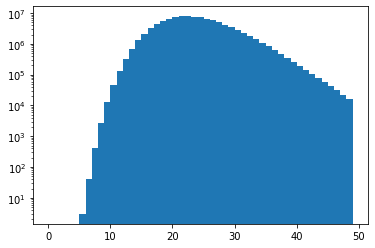

In [82]:
counts, bins, patches = plt.hist(samples,bins=np.arange(50),align='mid',log=True)

In [83]:
counts = counts/sum(counts)

(0.0, 50.0)

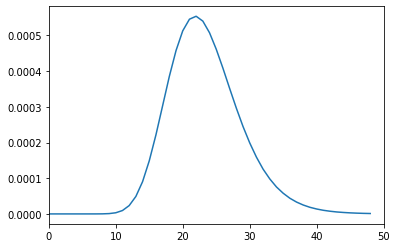

In [84]:
plt.plot(counts*0.007)
plt.xlim(0,50)

In [85]:
np.mean(samples)

23.900013655354176

In [86]:
np.savetxt('ttd_dist.txt',counts[:51])

In [87]:
np.sum(counts[:51])

1.0

In [48]:
np.std(samples)

1.1418641143007981

In [27]:
alpha1

35.16765819361817

In [28]:
beta1

0.14501960784313725

In [29]:
np.random.gamma?

In [52]:
plt.hist?